In [1]:
import numpy as np
import matplotlib.pyplot as plt
#Load data
data=np.loadtxt('datasets/data.txt',dtype='float64',delimiter=',')
# feature 1
x1=data[:,0].reshape((data.shape[0],1))
#feature 2
x2=data[:,1].reshape((data.shape[0],1))
#target
y=data[:,2]
y=y.reshape((len(y),1))

#normalize x1
mean_x1=  x1.mean()
std_x1=x1.std()
#normalize x2
mean_x2=  x2.mean()
std_x2=x2.std()

x1=(x1-mean_x1)/std_x1
x2=(x2-mean_x2)/std_x2

X=np.hstack((x1,x2))

Model: f(x1,x2) = w1*x1 + w2*x2 +b
let's put x=(x1,x2) w=(w1,w2)
X=matrice , lines are the expirement and columns are features
m= num of records = len(y)=len(x1) = len(x2)reshapeshape

In [2]:
def compute_model(x,w,b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    return np.dot(x,w)+b

In [3]:
def compute_cost(X,y,w,b):
    m = len(y)
    return (1/(2*m))*np.sum((compute_model(X,w,b)-y)**2)

In [4]:
#TEST 
compute_cost(X,y,np.ones((2,1)),1)

65591047222.90258

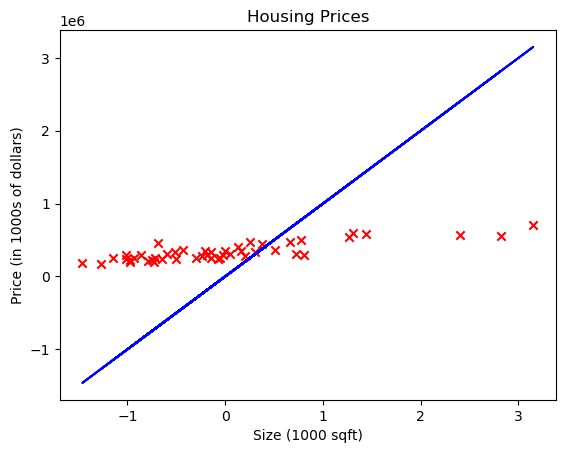

In [5]:
#according x1
w=10**6
b=1
tmp_f_wb = compute_model(x1, w, b,)
#Plot our model prediction
plt.scatter(x1, y, marker='x', c='r')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.plot(x1, tmp_f_wb, c='b',label='Our Prediction')
plt.show()
# Plot the data 

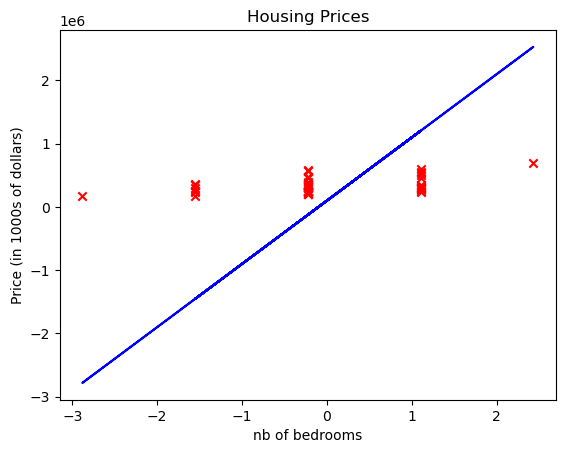

In [6]:
#according x2
w=10**6
b=10**5
tmp_f_wb = compute_model(x2, w, b,)
#Plot our model prediction
plt.scatter(x2, y, marker='x', c='r')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('nb of bedrooms')
plt.plot(x2, tmp_f_wb, c='b',label='Our Prediction')
plt.show()

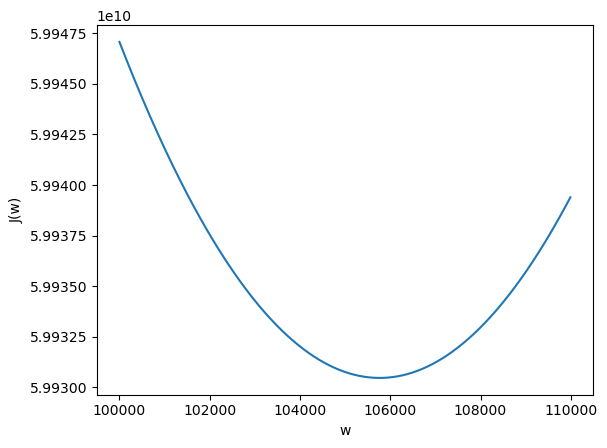

In [7]:
#cost function: w
w_range = np.arange(*[100000,110000],10)
b_range= np.arange(*[340000,350000],100)
costs=np.zeros_like(w_range,dtype='float')
for i in range(len(w_range)):
    costs[i]=compute_cost(x1,y,w_range[i],200)
plt.plot(w_range,costs)
plt.xlabel('w')
plt.ylabel('J(w)')
plt.show()


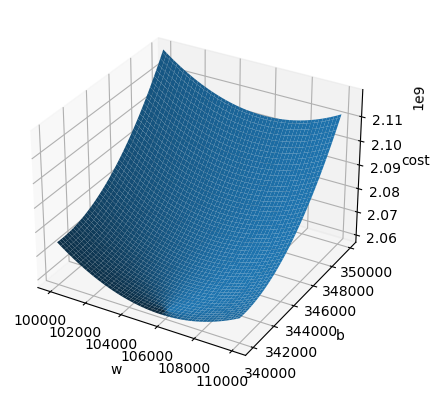

In [8]:
ax = plt.axes(projection ='3d')
# defining all 3 axes
# plotting
xs,ys=np.meshgrid(w_range,b_range)
costss=np.zeros_like(xs,dtype='float')
for i in range(xs.shape[0]):
    for j in range(ys.shape[1]):
        costss[i,j]=compute_cost(x1,y,xs[i][j],ys[i][j])
ax.plot_surface(xs, ys, costss)
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('cost')
plt.show()

In [9]:
#calculate gradient with vertoresation of fucnction
def compute_gradient(x, y, w, b):
    m=len(y)
    dw = (1/m)*x.T.dot(compute_model(x,w,b)-y)
    db=(1/m)*np.sum(compute_model(x,w,b)-y)
    return dw,db

In [10]:
initial_w = np.zeros((1,1))
initial_b = 0
#dw, db = compute_gradient(X[0:1],y[0:1] , initial_w, initial_b)

In [11]:
import copy
# gradient descente 
def gradient_descent(x, y, w_init, b_init, alpha, num_iters): 
    """    
    Args:
      x :    (ndarray): Shape (m,n)
      y :    (ndarray): Shape (m,)
      w_init, b_init : init value of vector w and scaler b
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                
     j_hist: history of values of cost function
     w1_hist: history of w1 param just to visualize in the end the progression of parameter cost function as
     a function of w1
    """
    
    # number of training examples
    m = len(y)
    
    j_hist = []
    w1_hist = []
    w = copy.deepcopy(w_init)  #avoid modifying global w within function
    b = b_init
    
    for i in range(num_iters):
        
        # histry of cost function and w1
        cost =  compute_cost(x, y, w, b)
        j_hist.append(cost)
        w1_hist.append(w[0])
        # Calculate the gradient and update the parameters
        dw, db = compute_gradient(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dw               
        b = b - alpha * db
        
    return w, b, j_hist,w1_hist

In [12]:
print(x1.shape)
w,b,j_hist,w1_hist = gradient_descent(X,y,np.ones((X.shape[1],1),dtype='int64'),0,0.1,50000) 
print(w,b)

(47, 1)
[[109447.79646964]
 [ -6578.35485416]] 340412.6595744678


In [13]:
# see if there is no much changes in cost function, id it is the case then raise the number of iterations 
for i in range(-10,-1):
    print(j_hist[i]-j_hist[i+1])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [14]:
def predect(f1,f2):
    f=np.array([f1,f2])
    std = np.array([std_x1,std_x2])
    mean = np.array([mean_x1,mean_x2])
    f = (f-mean)/std
    y= f.dot(w)+b
    return y.item()

In [15]:
print(predect(2103,3))

356143.8996648802


Skitlearn

In [16]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter=500000, eta0=0.1)
model.fit(X,y)
print(model.predict(X)[0])

357070.7736699161


C:\Users\moham\miniconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


values getting from our model are close to that getting from sklearn, the value of our model is even closer to the real value

ValueError: x and y must have same first dimension, but have shapes (50000, 1) and (100,)

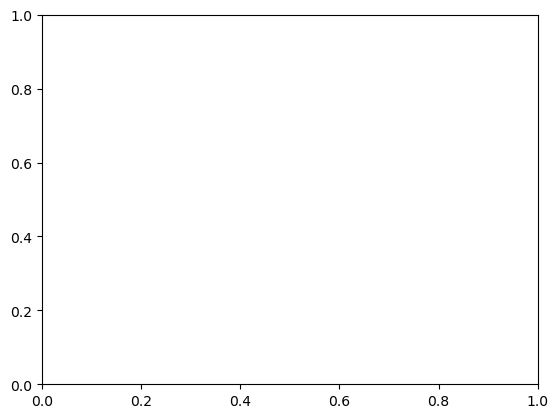

In [17]:
# plot progression of cost function in the first 1000 etirations
plt.plot(w1_hist,j_hist[:100])
plt.show()